# Data Analysis and Visualization
Data from Ordnungsamt

### Content
1. Data Visualization 
2. Data Analysis

### Questions to understand the data
- What is the message pct per district?
- Which district has the most resolved complaints?
- Which district has the most resolved complaints?
- Which district has complaints resolved the fastest?
- what are the 6 repeated messages?
- What day of the week has the most posts?
- What time have more posts?

--------------------------------
- What is the mean of solved issues about bulky waste per distict?



### Hypothesis

- A new item doesn’t stay on streets more than one day
-  Are Kreusberg and Neukölln the neighbourhood were more items are thrown away?
- Most of the items thrown away are in bad condition (probably not possible to find)
- Most of the items are throws away early in the morning, during weekends.


TODO: everything. For now, it only have examples

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
# %matplotlib 

In [2]:
# set maximum number of rows
pd.set_option('display.max_rows', 20)

In [3]:
# import the data
df_original = pd.read_csv('data/data_ordnungsamt.csv')
df_original.shape

(5408, 7)

In [4]:
df_original.head(10)

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
5,883168,['uaxhc1'],Reinickendorf,Gehweg/Radweg zugeparkt,23.02.2018 - 16:50:57,In Bearbeitung,NaN
6,885548,['fn5am9'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,27.02.2018 - 21:12:00,In Bearbeitung,Kfz steht in der kurve. Mit plane abgedeckt.
7,890996,['56ups1'],Reinickendorf,"Parkraumbewirtschaftung - Anwohner-, Gästevign...",06.03.2018 - 22:12:36,In Bearbeitung,ca. 13.22 Uhr\n\nkeine Vignette keine Parksche...
8,950160,['ysxgxt'],Reinickendorf,Straßenaufsicht - Defekte Ampel,08.05.2018 - 16:30:29,In Bearbeitung,Rotlicht an Ampel K5 komplett erloschen. Ampel...
9,1018325,['vgibr5'],Spandau,Parkraumbewirtschaftung - Sonstiges,12.07.2018 - 21:45:50,In Bearbeitung,Seit vier Tagen parkt in falscher Fahrtrichtun...


In [5]:
df_original.columns

Index(['id', 'meldungsNummern', 'bezirk', 'betreff', 'erstellungsDatum',
       'status', 'sachverhalt'],
      dtype='object')

In [6]:
# check the statistics 
# df_original.describe()

In [7]:
print(df_original.isnull().sum())

id                   0
meldungsNummern      0
bezirk               0
betreff              0
erstellungsDatum     0
status               0
sachverhalt         20
dtype: int64


In [8]:
df_original.sachverhalt.describe()

count              5388
unique             4443
top       Einkaufswagen
freq                 54
Name: sachverhalt, dtype: object

In [9]:
df = df_original.copy()
df

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
2,622944,['vf943l'],Lichtenberg,Park- und Haltverbot nicht berücksichtigt,11.04.2017 - 14:31:38,In Bearbeitung,Pkw in geschützter Grünanlage aufgefahren
3,681533,['pkyi2p'],Lichtenberg,Parken auf Gehweg,25.06.2017 - 13:09:47,In Bearbeitung,NaN
4,788708,['9axrlt'],Lichtenberg,Abfall - Müllablagerung,27.10.2017 - 12:30:24,In Bearbeitung,Bauschutt
...,...,...,...,...,...,...,...
5403,4332959,['h1j475'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 18:15:00,Erledigt,Jede Menge Altkleider die seit Wochen nass und...
5404,4332991,['451zwh'],Friedrichshain-Kreuzberg,Abfall - Sperrmüll,27.02.2023 - 19:18:26,Erledigt,BSR: 2 Sessel #27022023
5405,4332976,['lmcf0h'],Friedrichshain-Kreuzberg,Abfall - Sonstiges,27.02.2023 - 19:32:33,Erledigt,"Ein Zelt nebst einigen Klamotten, Hausrat. etc..."
5406,4332954,['rq3hfl'],Friedrichshain-Kreuzberg,Abfall - Müllablagerung,27.02.2023 - 19:46:26,Erledigt,Glasmüll und Plastikmüll neben Glascontainern


### Data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5408 non-null   int64 
 1   meldungsNummern   5408 non-null   object
 2   bezirk            5408 non-null   object
 3   betreff           5408 non-null   object
 4   erstellungsDatum  5408 non-null   object
 5   status            5408 non-null   object
 6   sachverhalt       5388 non-null   object
dtypes: int64(1), object(6)
memory usage: 295.9+ KB


### Transform id column in string

In [11]:
df['id'] = df['id'].map(str)
# df.info()

In [12]:
# df['erstellungsDatum'] = pd.to_datetime(df['erstellungsDatum']) 
# df['erstellungsDatum']

### Removing other disturbances

In [13]:
df.betreff.unique()

array(['Sperrmüll abgelagert (Spiegel)',
       'Sperrmüll abgelagert (Holz-/Regalteile)',
       'Park- und Haltverbot nicht berücksichtigt', 'Parken auf Gehweg',
       'Abfall - Müllablagerung', 'Gehweg/Radweg zugeparkt',
       'Parkraumbewirtschaftung - Anwohner-, Gästevignetten',
       'Straßenaufsicht - Defekte Ampel',
       'Parkraumbewirtschaftung - Sonstiges', 'Grünanlage/Park - Grillen',
       'Abfall - Sperrmüll', 'Abfall - Bauabfälle, Bauschutt',
       'Grünanlage/Park - Campieren, Zelten', 'Lärm - Gaststätte',
       'Sondernutzung - Schankvorgärten (Tische und Stühle) KORI AND FAY',
       'Abfall - Sonstiges',
       'Parkraumbewirtschaftung - Ausnahme, Betriebsvignetten',
       'Straßenaufsicht - Wildwuchs von Privatgelände', 'Campieren',
       'Obdachlosenunterkunft',
       'Straßenverkehrsrechtliche Anordnungen - Verkehrszeichen',
       'Ladenöffnung - Sonn- und Feiertage',
       'Sondernutzung - Abfallcontainer', 'Straßenaufsicht - Sonstiges',
       'Baust

In [14]:
### Clean subject column keeping only "Sperrmüll abgelagert"

# drops the columns that has not Sperrmüll abgelagert in the subject column   
df_narrow = df[(df.betreff.str.startswith('Sperrmüll abgelagert'))]
df_narrow.head(55)

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Spiegel),18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert (Holz-/Regalteile),18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,06.05.2020 - 10:50:02,In Bearbeitung,Sperrmüll
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,20.08.2020 - 09:06:18,In Bearbeitung,Sperrmüll
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,04.11.2020 - 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw..."
...,...,...,...,...,...,...,...
1356,4181338,"['7u0we9', 'dmhc01', 'f7z37l', 'k8bgn5', 'o45r...",Neukölln,Sperrmüll abgelagert,04.01.2023 - 09:25:08,Erledigt,Sperrmüll
1359,4182872,"['m840zl', 'ys6gox']",Neukölln,Sperrmüll abgelagert,04.01.2023 - 09:52:16,In Bearbeitung,"Müll, Sperrmüll"
1365,4183230,['vkg8ap'],Neukölln,Sperrmüll abgelagert,04.01.2023 - 19:58:48,In Bearbeitung,Unter Fußgängerbrücke und an der Auffahrt zur ...
1386,4186726,['5hfl6p'],Neukölln,Sperrmüll abgelagert,06.01.2023 - 10:55:48,Erledigt,Holzbretter.


In [15]:
df_narrow = df_narrow.replace('Sperrmüll abgelagert (Spiegel)', 'Sperrmüll abgelagert')
df_narrow = df_narrow.replace('Sperrmüll abgelagert (Holz-/Regalteile)', 'Sperrmüll abgelagert')
df_narrow.betreff.unique()


array(['Sperrmüll abgelagert'], dtype=object)

### Missing Values

In [16]:
# Get counts of Nan values - df['sachverhalt'].isna().sum()
print("Missing values in sachverhalt column: " + str(df['sachverhalt'].isna().sum()))
 

Missing values in sachverhalt column: 20


In [17]:
# % pf missing values
pct_missing = (20/5408) * 100
pct_missing

0.3698224852071006

In [18]:
print("Missing values in sachverhalt column: " + str(df_narrow['sachverhalt'].isna().sum()))

Missing values in sachverhalt column: 4


In [19]:
df_narrow.shape

(614, 7)

In [20]:
# % pf missing values
pct_missing = (4/614) * 100
pct_missing

0.6514657980456027

Since we the dataset has only 4 nulls (0,651%) in the 'Sachveralt'columns, the rows with null values with be droped. 

In [21]:
# drop rows with nulls
df_narrow = df_narrow.dropna()

In [22]:
# check nulls
df_narrow.isnull().sum()

id                  0
meldungsNummern     0
bezirk              0
betreff             0
erstellungsDatum    0
status              0
sachverhalt         0
dtype: int64

In [23]:
df_narrow.shape

(610, 7)

### Remove extra spaces

In [24]:
df_narrow.sachverhalt.str.strip()

0                                                 Spiegel
1                                        Holz-/Regalteile
59                                              Sperrmüll
69                                              Sperrmüll
82      Sehr geehrtes Team,\n\nauf der Gradestraße, zw...
                              ...                        
5388                                        1 Tischplatte
5389                                     Kinderwagen etc.
5393                                        1 Holzpalette
5398                                            Holzmöbel
5401                                      Alte Regalreste
Name: sachverhalt, Length: 610, dtype: object

In [25]:
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,18.01.2017 - 15:01:09,In Bearbeitung,Spiegel
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,18.01.2017 - 15:05:54,In Bearbeitung,Holz-/Regalteile
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,06.05.2020 - 10:50:02,In Bearbeitung,Sperrmüll
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,20.08.2020 - 09:06:18,In Bearbeitung,Sperrmüll
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,04.11.2020 - 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw..."


### Creating a weekday column

In [26]:

df_narrow['erstellungsDatum'] = pd.to_datetime(df['erstellungsDatum'])
df_narrow['day_of_week'] = df_narrow['erstellungsDatum'].dt.day_name()
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt,day_of_week
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel,Wednesday
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile,Wednesday
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll,Friday
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll,Thursday
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw...",Saturday


### Creating columns date and time

In [27]:
df_narrow['time'] = pd.to_datetime(df_narrow['erstellungsDatum']).dt.time

df_narrow['date'] = pd.to_datetime(df_narrow['erstellungsDatum']).dt.date


In [81]:
#Add a month column
df_narrow['month'] = df_narrow['date'].apply(lambda x: x.strftime('%b'))

In [28]:
df_narrow.head()

,id,meldungsNummern,bezirk,betreff,erstellungsDatum,status,sachverhalt,day_of_week,time,date
0,527563,['ljf29'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:01:09,In Bearbeitung,Spiegel,Wednesday,15:01:09,2017-01-18
1,527575,['51cx6p'],Friedrichshain-Kreuzberg,Sperrmüll abgelagert,2017-01-18 15:05:54,In Bearbeitung,Holz-/Regalteile,Wednesday,15:05:54,2017-01-18
59,1804983,['b6pfcx'],Neukölln,Sperrmüll abgelagert,2020-06-05 10:50:02,In Bearbeitung,Sperrmüll,Friday,10:50:02,2020-06-05
69,1952905,['2a1t6p'],Neukölln,Sperrmüll abgelagert,2020-08-20 09:06:18,In Bearbeitung,Sperrmüll,Thursday,09:06:18,2020-08-20
82,2059167,['rw035t'],Neukölln,Sperrmüll abgelagert,2020-04-11 08:02:10,In Bearbeitung,"Sehr geehrtes Team,\n\nauf der Gradestraße, zw...",Saturday,08:02:10,2020-04-11


### Frequency of values

In [29]:
columns_list = ['id', 'meldungsNummern', 'bezirk', 'betreff', 'erstellungsDatum',
       'status', 'sachverhalt']

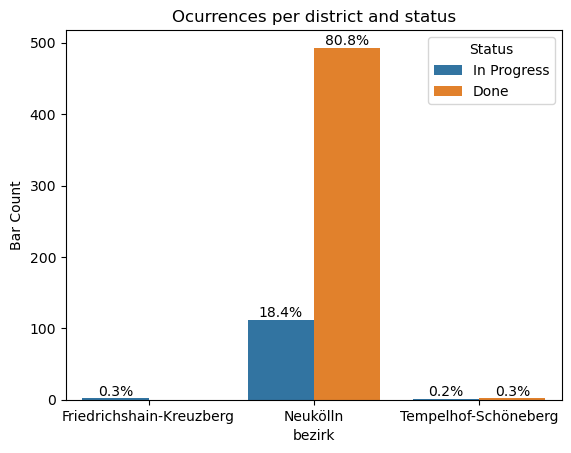

In [91]:
# plot
fig, ax = plt.subplots()
ax = sns.countplot(x="bezirk", hue="status", data=df_narrow)
ax.set(ylabel='Bar Count', title='Ocurrences per district and status')
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df_narrow.status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

### Timeseries

In [92]:
in_progress = df_narrow[df_narrow['status'] == 'In Bearbeitung']
done = df_narrow[df_narrow['status'] == 'Erledigt']

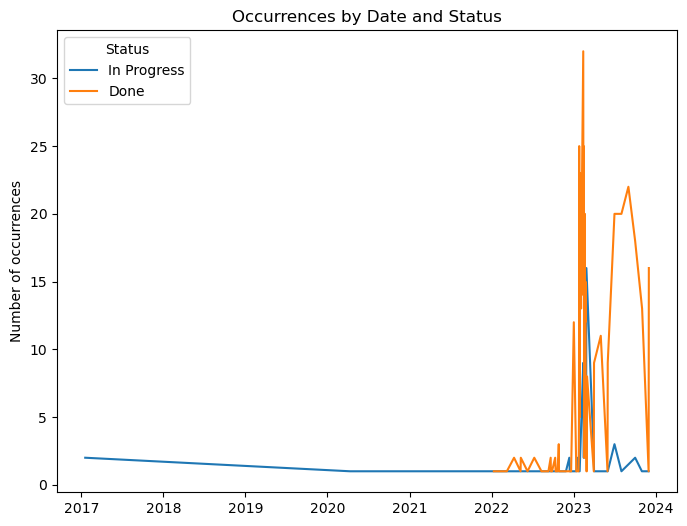

In [93]:
# prepare and plot

in_progress_df = pd.DataFrame(in_progress.groupby(['date'])['bezirk'].count()).reset_index()
in_progress_df['date'] = pd.to_datetime(in_progress_df['date'])
in_progress_date = in_progress_df['date']
in_progress_value = in_progress_df['bezirk']
# in_progress_df


done_df = pd.DataFrame(done.groupby(['date'])['bezirk'].count()).reset_index()
done_df['date'] = pd.to_datetime(done_df['date'])
done_date = done_df['date']
done_value = done_df['bezirk']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(in_progress_date, in_progress_value)
ax.plot(done_date, done_value)

ax.set_title('Occurrences by Date and Status')
ax.set_ylabel('Number of occurrences')
ax.legend(title='Status', loc='upper left', labels=['In Progress', 'Done'])

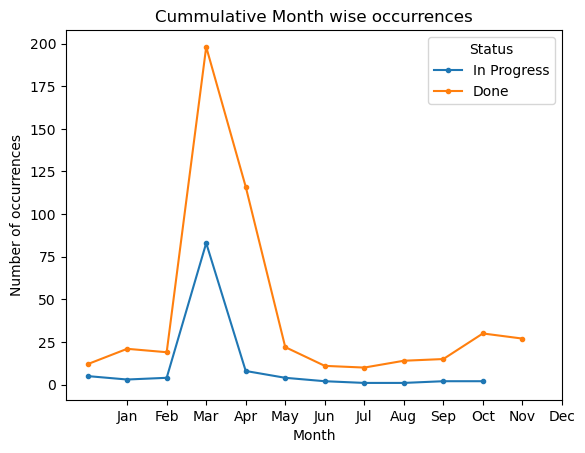

In [96]:
fig, ax = plt.subplots()

in_progress.groupby(['month'])['bezirk'].count().plot(marker = '.')
done.groupby(['month'])['bezirk'].count().plot(marker = '.')
ax.set_xlabel('Month')
ax.set_ylabel('Number of occurrences')
ax.set_title('Cummulative Month wise occurrences')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend(title='Status', loc='upper right', labels=['In Progress', 'Done'])
plt.show()

In [ ]:
print("Unique Value Count:")
cols = df.columns.tolist()
for col in cols:
  print(col + " = " + str(len(df[col].unique())))

In [ ]:

# # Summarising the matching points of interest per each route
# to_plot = df.groupby(by='betreff').agg({'meldungsNummern':'count'}).reset_index().sort_values(by='erstellungsDatum', ascending=False)
# barplot = df.plot.bar(
#     x='bezirk', 
#     xlabel = 'routes', 
#     ylabel = '# of points of interest', 
#     title='Sum of matched points of interest per route', 
#     use_index=False,
#     figsize=(20,8)
#     )
# # print('The median amount of points of interest per route in our joined dataframe is:', gdf_poiperroute['poi_lat_lgt'].median())

In [ ]:
# df['NU_IDADE'].value_counts(normalize=True)

In [ ]:
vxdfFG

In [ ]:
# check the distribution
df['column'].hist()
df['column'].hist(bins=20, figsize=(10,8))

In [ ]:

df['column'].value_counts()

In [ ]:
# comparando todas as variaveis
sns.pairplot(dados_sem_notas_zero[provas])

dados_sem_notas_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_estado_rj = dados_sem_notas_zero.query("SG_UF_RESIDENCIA == 'RJ'")
sns.pairplot(dados_estado_rj[provas])

In [ ]:
# fazer histograma de treineiros e não-treineiros.

# frequency (having boolean)
Using Pandas
ax = dados['IN_TREINEIRO'].value_counts().plot(kind='bar', figsize=(6,4), width=.35, color=['gray', 'orange']) 
degrees = 0 

ax.set_title("Frequência de treineiros", fontname='Arial', fontsize=25, y=1.01)
ax.set_ylabel("Frequência", fontname="Arial", fontsize=20)
plt.gca().xaxis.set_major_formatter(EngFormatter())
plt.gca().yaxis.set_major_formatter(EngFormatter()) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.xticks(rotation=degrees)
ax.set_xticklabels( ('não treineiros', 'treineiros') )

In [ ]:
# descobrir de quais Estados sao os inscritos com 13 anos.
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA']

In [ ]:
# colocar títulos no histograma.
ax = dados['NU_NOTA_REDACAO'].hist(bins=20) 
ax.set_title('Notas de Redação', fontname='Arial', fontsize=15, y=1.01)
ax.set_xlabel('notas')
ax.set_ylabel('count')

# import pylab as pl
# using pylab
axes = dados['NU_NOTA_REDACAO'].hist(bins=20, figsize=(6,4))
pl.suptitle("Nota da Redação - pylab")

In [ ]:
dados['NU_NOTA_REDACAO'].mean()
dados['NU_NOTA_REDACAO'].std()
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados[provas].describe()

In [ ]:
# ax = dados[provas].plot.box(grid = True, figsize = (8,6))
# ax.set_title('Notas nas diferentes áreas', fontname='Arial', fontsize=15, y=1.01)
# ax.set_ylabel('count')


# explorando os dados por  visualizacao using boxplot
ax = boxplot = dados[provas].plot.box(grid = False, figsize=(10,5),layout=(3,3))
ax.set_title('Notas nas diferentes áreas', fontname='Arial', fontsize=15, y=1.01)
ax.set_ylabel('count')

In [ ]:
# explorando os dados por  visualizacao using histogram
ax = dados[provas].hist(grid=False,figsize=(10,8),layout=(3,3))
plt.show()

In [ ]:
Interpretation:
    - Distributions: 
    - Outliers
    - Correlations (take care with causality)

In [ ]:
# removendo dados que nao quero analizar
dados_escolhidos1 = dados.drop(['NU_INSCRICAO', 'NU_ANO'])
                                
dados_escolhidos1.columns.values

In [ ]:
# definindo variaveis para explorar
exploracao1 = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# checando correlacoes entre os tipos de escola com as notas nas diferentes áreas
corr = dados[exploracao1].corr()
corr.style.background_gradient(cmap='coolwarm')
 

In [ ]:
# checando correlacoes com grafico heatmap (3 niveis de dificuldade)
sns.heatmap(correlacao, cmap='Blues', center=0, annot=True)

import numpy as np
df_provas = dados[provas]
matrix = np.triu(df_provas.corr())
sns.heatmap(df_provas.corr(), cmap='viridis', annot=True, mask=matrix
            
corr_rj = dados_estado_rj[provas].corr()
matrix = np.triu(np.ones_like(corr_rj, dtype=bool))
sns.heatmap(corr_rj, cmap='viridis', annot=True, mask=matrix)

In [ ]:
# Pct of the values de uma coluna
status_redacao = pd.Series(dados_escolhidos2['TP_STATUS_REDACAO'])
status_redacao.value_counts(normalize=True)

In [ ]:
print('''Tipos de escolas:
1-desconhecida
2-publica
3-privada''')

labels = ['desconhecida', 'publica','privada']
x = sns.stripplot(data = dados_escolhidos2, x = 'TP_ESCOLA', y = 'NU_NOTA_REDACAO',
           jitter = 0.35 , alpha =  1/3);
plt.title('Tipo de escola vs. notas de redação', fontsize=14, y=1.015)


In [ ]:
# visualizacao de violino
# Desafio06: explorar a documentacao e visualizações com matplotlib ou pandas e gerar novas visualizações
base_color = sns.color_palette()[0]
sns.violinplot(data = dados_escolhidos2, x = 'TP_SEXO', y = 'NU_NOTA_REDACAO', color=base_color)
plt.title('Tipo de Sexo vs. Notas de Redacao')

In [ ]:
# Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

plt.figure(figsize=(16,10))
sns.histplot(dados_sem_notas_zero, x = 'NU_NOTA_TOTAL')
plt.axvline(dados_sem_notas_zero['NU_NOTA_TOTAL'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(dados_sem_notas_zero['NU_NOTA_TOTAL'].median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(dados_sem_notas_zero['NU_NOTA_TOTAL'].mode()[0], color='r', linestyle='dashed', linewidth=1)

In [ ]:
# Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.
dados_sem_notas_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_estado_rj = dados_sem_notas_zero.query("SG_UF_RESIDENCIA == 'RJ'")
sns.pairplot(dados_estado_rj[provas])

In [ ]:

#Since its too much data to visualize and understand, lets bucket the age as below
#feature engineering FTW!
def bucket_age(age):
  if age < 15:
    return "<15"
  if age >= 15 and age < 30:
    return "15-30"
  if age >=30 and age < 45:
    return "30-45"
  if age>=45 and age < 60:
    return "45-60"
  return ">60"

df['AgeBucket'] = df['Age'].apply(bucket_age)

#Visualize this with a pie chart
pie = df['AgeBucket'].value_counts().plot(kind="pie",title='AgeBucket Distribution',legend=True,autopct='%1.1f%%')

In [ ]:
#What is the survival rate among these classes?
df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True,title="Survival Distribution among Pclasses")
ax = plt.show()

In [ ]:

plt.figure(figsize=(16,8))
crime_df.groupby(['MONTH'])['INCIDENT_NUMBER'].count().plot(marker = 'o')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Cummulative Month wise Crimes in Boston')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [ ]:
crime_df.groupby(['MONTH','DAY_OF_WEEK']).size().unstack()

In [ ]:
crime_line = crime_df.groupby(['MONTH','DAY_OF_WEEK']).size().unstack

References
- [Time series with Matplotlib](https://www.python-graph-gallery.com/basic-time-series-with-matplotlib)